In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import pandas as pd

from lib.Diccionariacion import awards_wipo, awards_gdp
from scipy.optimize import curve_fit

In [2]:
root = r'.'

In [67]:
results_wipo = root + r'\data\results\wipo\2015-2019\Ranking_DCI_wipo.csv'
results_awards = root + r'\data\results\awards\2015-2019\Ranking_DCI_awards.csv'
PIB_mean = root + r'\data\datasets\IMF_GDP_per_PPA_April_2024.xlsx'
df = pd.read_excel(PIB_mean).loc[:, ['Country', 'mean_2']]

DCI_awards = {}
DCI_wipo = {}
PIB = {}

with open(results_awards, 'r', encoding = 'utf-8') as file:
    for row in file.readlines()[1:]:
        dci, country = row.rstrip('\n').split(',')[1:]
        DCI_awards[country] = float(dci)

with open(results_wipo, 'r', encoding = 'utf-8') as file:
    for row in file.readlines()[1:]:
        dci, country = row.rstrip('\n').split(',')[1:]
        DCI_wipo[country] = float(dci)

for i in range(len(df)):
    PIB.update([df.loc[i]])

print(len(DCI_wipo))

78


In [75]:
DCIs_PIB = np.full((len(awards_wipo), 3), fill_value = np.nan)
paises = []
with open(root + r'\test\Triplete_DCI.csv', 'w+', encoding = 'utf-8') as f:
    f.write('country,dci_award,dci_wipo,pib_mean\n')
    for n, (c_award, c_wipo) in enumerate(awards_wipo.items()):
        c_gdp = awards_gdp[c_award]
        if c_wipo is not None:
            dci_award = DCI_awards[c_award]
            dci_wipo = DCI_wipo[c_wipo]
            pib_mean = PIB[c_gdp]
            DCIs_PIB[n] = [dci_award, dci_wipo, pib_mean]
            paises.append(c_gdp)
            f.write(f'{c_gdp},{dci_award},{dci_wipo},{pib_mean}\n')

    

In [73]:
paises

['United States',
 'Italy',
 'China',
 'Germany',
 'United Kingdom',
 'Türkiye',
 'Korea',
 'Canada',
 'Russia',
 'Hungary',
 'Islamic Republic of Iran',
 'Japan',
 'India',
 'Australia',
 'Brazil',
 'Netherlands',
 'France',
 'Singapore',
 'Spain',
 'Czech Republic',
 'Israel',
 'Poland',
 'Switzerland',
 'Greece',
 'Lithuania',
 'Portugal',
 'Sweden',
 'Belgium',
 'Mexico',
 'Austria',
 'Denmark',
 'Ukraine',
 'Serbia',
 'Bulgaria',
 'Egypt',
 'Croatia',
 'Ireland',
 'Malaysia',
 'Latvia',
 'Romania',
 'Argentina',
 'New Zealand',
 'Vietnam',
 'Indonesia',
 'Slovenia',
 'United Arab Emirates',
 'Norway',
 'Lebanon',
 'Saudi Arabia',
 'South Africa',
 'Jordan',
 'Chile',
 'Moldova']

In [47]:
mask = np.isnan(DCIs_PIB[:, 0])
DCIs = DCIs_PIB[:, 0:2][~mask]
DCI_eff_awards, DCI_eff_wipo = DCIs.T
PIB_eff = DCIs_PIB[:, 2][~mask]

In [6]:
X = np.array([np.min(doble_DCI[:, 0][~mask]), np.max(doble_DCI[:, 0][~mask])])
Y = m * X + c

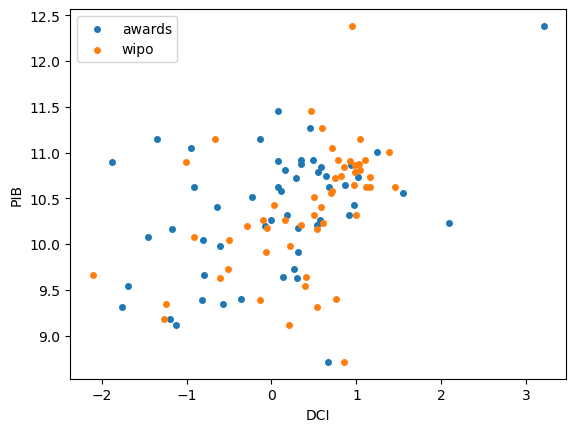

In [29]:
plt.scatter(DCI_eff_awards, np.log1p(PIB_eff), s = 4**2, label = 'awards')
plt.scatter(DCI_eff_wipo, np.log1p(PIB_eff), s = 4**2, label = 'wipo')
#plt.plot(X, Y, label = f'$m = {m:.3f}$\n$\\rho^2={rho**2:.3f}$\n$p={pvalue:.3f}$', color = 'tab:red', linestyle = '--', alpha = 0.7)

plt.xlabel('DCI')
plt.ylabel('PIB')
plt.legend()

In [51]:
Y = lambda X, a, b, c: a + b * X[:, 0] + c * X[:, 1]
curve_fit(Y, DCIs, PIB_eff)

(array([37172.2800002 , 15117.19944179,  5753.4063729 ]),
 array([[ 22017995.53422396,   4307067.23093519, -13992124.31209144],
        [  4307067.23093519,  23583241.2504434 , -14377556.00932402],
        [-13992124.31209144, -14377556.00932402,  39067152.27602208]]))